In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import pandas as pd

data = pd.read_csv(r"train_final.csv")
data = data.drop('id', axis = 1)

In [3]:
print(f'train set은 {data.shape[1]} 개의 feature를 가진 {data.shape[0]} 개의 데이터 샘플로 이루어져 있습니다.')
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.


data.head(10)

train set은 23 개의 feature를 가진 2999 개의 데이터 샘플로 이루어져 있습니다.


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Male,Loyal Customer,72,Business travel,Business,1784,1,1,4,1,3,5,5,2,2,3,2,5,2,0,0,0,1
1,Male,Loyal Customer,35,Business travel,Business,2228,2,5,5,5,1,1,2,2,2,2,2,4,2,0,0,8,0
2,Male,disloyal Customer,37,Business travel,Eco,1970,4,3,4,1,1,4,1,1,3,2,5,1,4,0,1,2,1
3,Female,Loyal Customer,20,Personal Travel,Eco,2249,5,5,1,3,1,1,1,1,4,1,4,1,5,0,0,0,1
4,Male,disloyal Customer,38,Business travel,Eco,1995,2,2,2,2,5,2,5,5,2,5,3,1,2,0,110,102,0
5,Male,Loyal Customer,18,Personal Travel,Eco,2195,3,5,3,3,5,3,5,5,5,2,4,3,5,0,0,0,0
6,Female,Loyal Customer,51,Personal Travel,Eco,886,5,1,5,4,5,3,3,3,3,5,1,2,3,0,0,2,1
7,Male,disloyal Customer,22,Business travel,Eco,1971,3,3,3,3,5,3,5,5,1,5,2,2,4,0,35,17,0
8,Female,Loyal Customer,35,Personal Travel,Eco,1185,5,5,1,5,3,3,3,3,4,4,3,1,2,0,0,0,1
9,Female,Loyal Customer,52,Business travel,Business,342,4,3,5,5,5,4,3,4,4,4,4,4,4,0,19,9,0


In [4]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values

    return summary

resumetable(data)

데이터 세트 형상: (2999, 23)


,피처,데이터 타입,결측값 개수,고윳값 개수
0,Gender,object,0,2
1,Customer Type,object,0,2
2,Age,int64,0,73
3,Type of Travel,object,0,2
4,Class,object,0,3
5,Flight Distance,int64,0,2003
6,Seat comfort,int64,0,6
7,Departure/Arrival time convenient,int64,0,6
8,Food and drink,int64,0,6
9,Gate location,int64,0,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             2999 non-null   object
 1   Customer Type                      2999 non-null   object
 2   Age                                2999 non-null   int64 
 3   Type of Travel                     2999 non-null   object
 4   Class                              2999 non-null   object
 5   Flight Distance                    2999 non-null   int64 
 6   Seat comfort                       2999 non-null   int64 
 7   Departure/Arrival time convenient  2999 non-null   int64 
 8   Food and drink                     2999 non-null   int64 
 9   Gate location                      2999 non-null   int64 
 10  Inflight wifi service              2999 non-null   int64 
 11  Inflight entertainment             2999 non-null   int64 
 12  Online

In [6]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,39.578193,1970.913971,2.820940,2.966656,2.866622,3.005669,3.250417,3.401467,3.527176,3.489496,3.495498,3.507503,3.713571,3.349116,3.721574,3.361787,14.520840,15.054018,0.547516
std,15.192597,1010.887709,1.395079,1.528762,1.454290,1.305669,1.304395,1.322388,1.311866,1.297791,1.252841,1.294724,1.140111,1.240504,1.141216,1.307399,34.447669,35.426230,0.497820
min,7.000000,55.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1344.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,1939.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2554.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6588.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,435.000000,470.000000,1.000000


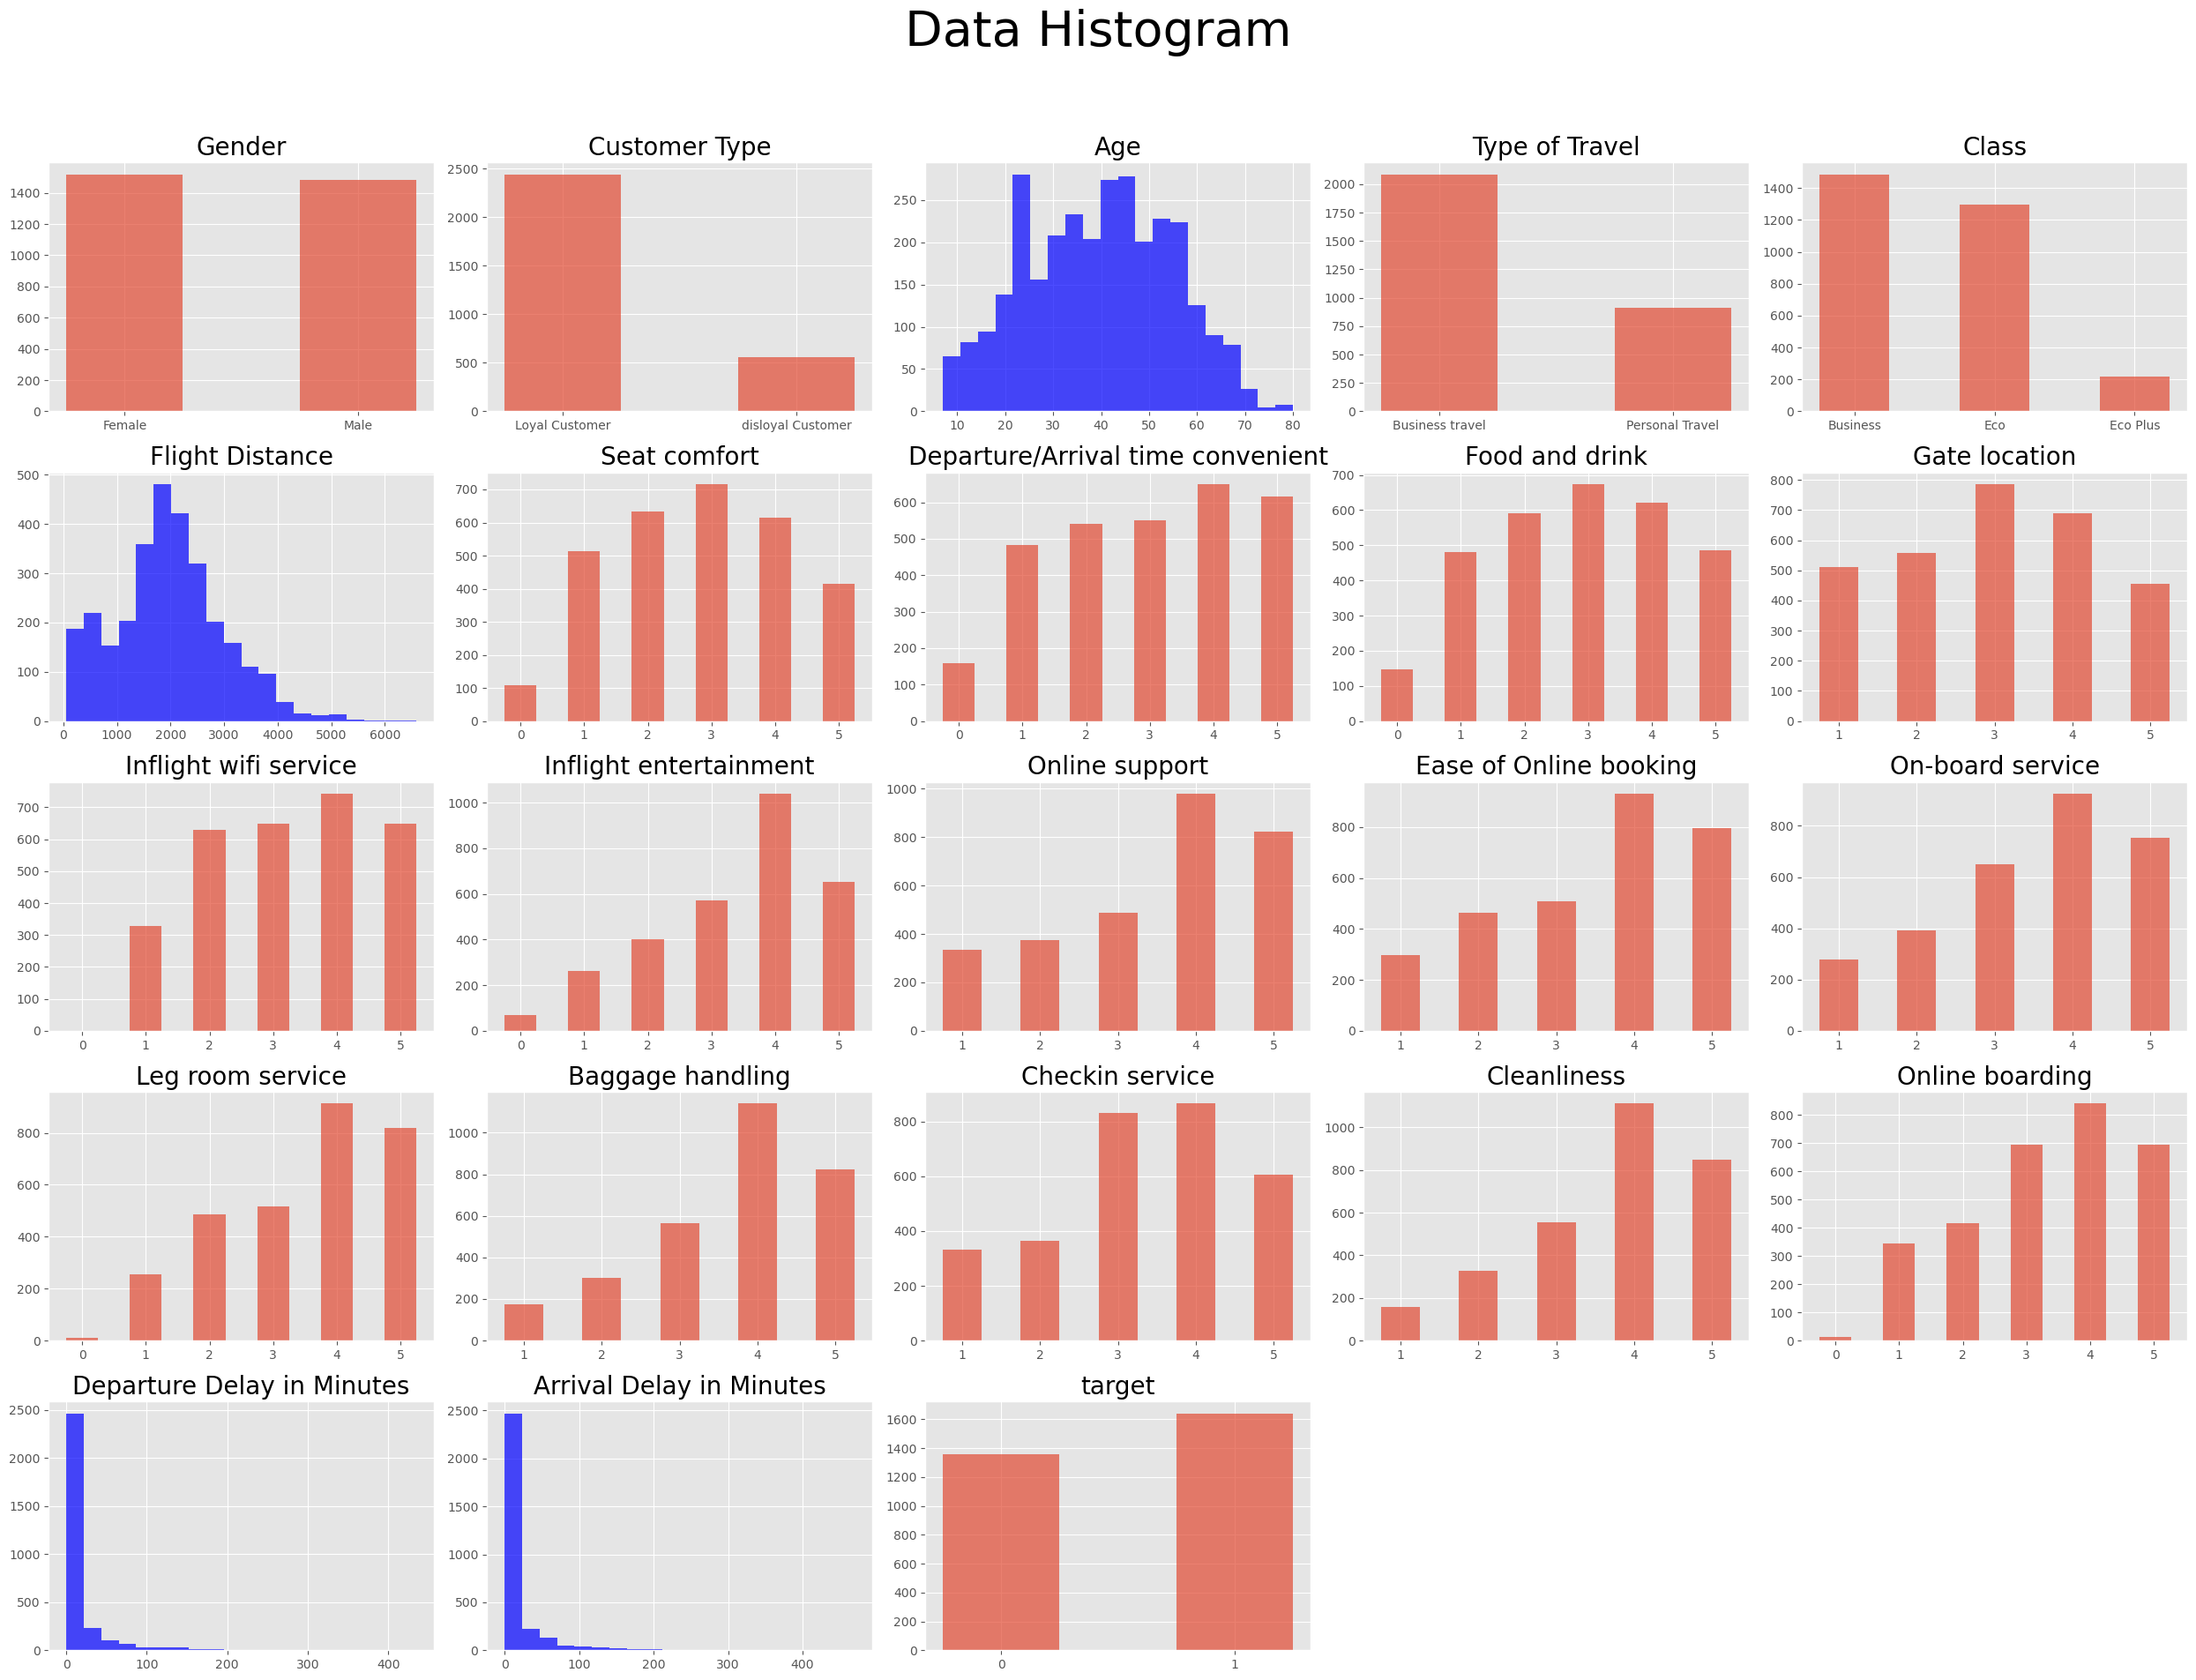

In [7]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = data.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

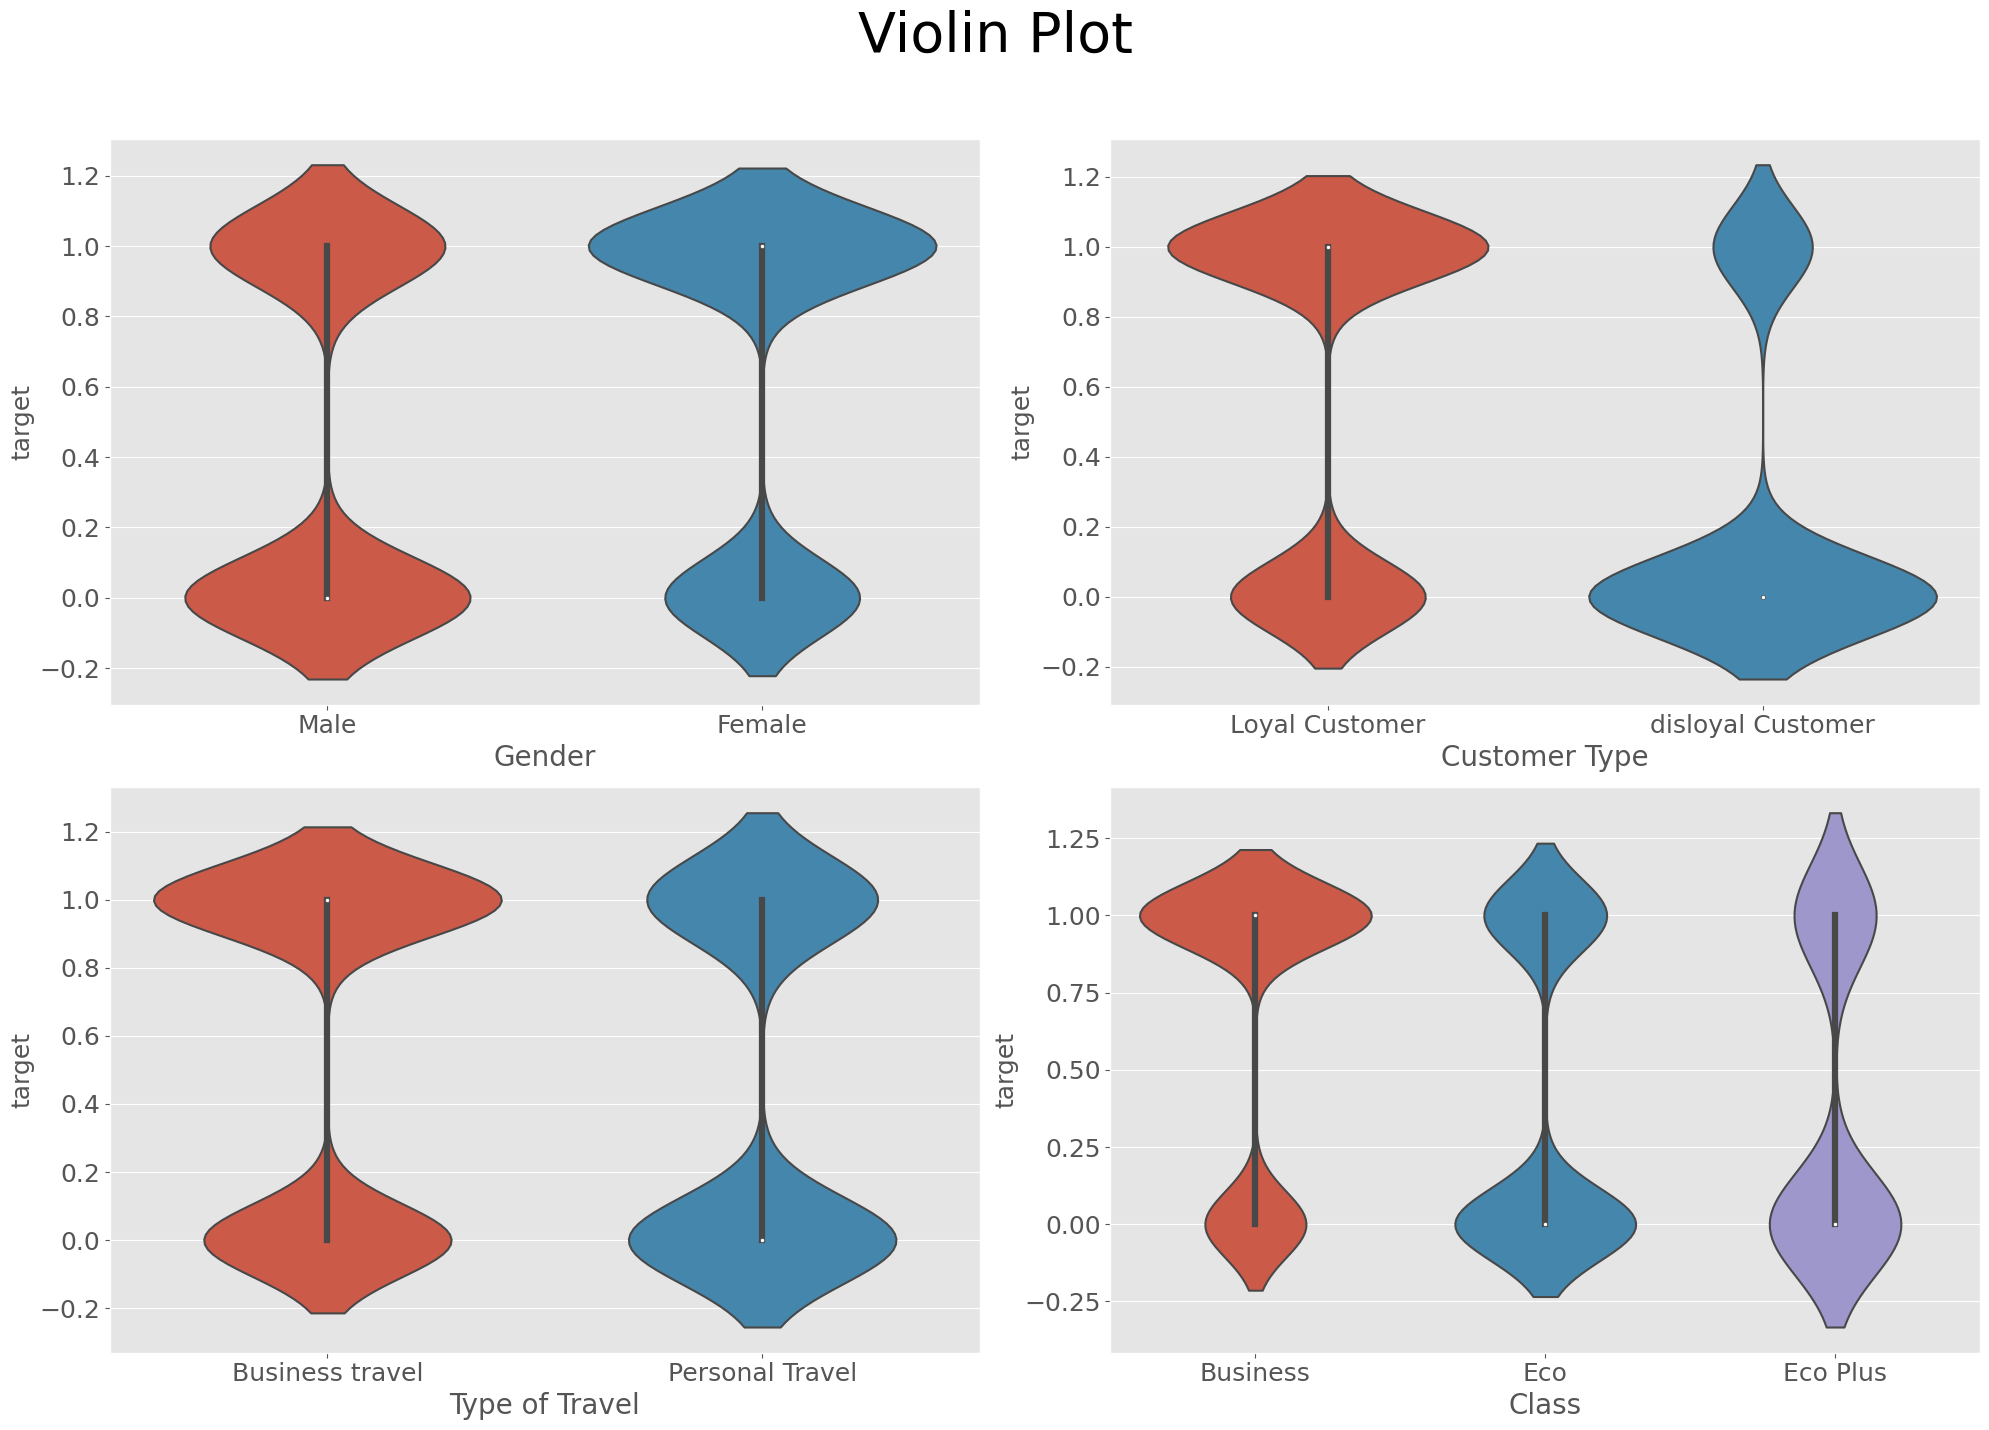

In [8]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i], fontsize=20)  # X축 제목 폰트 크기
    plt.ylabel(target, fontsize=18)                  # Y축 제목 폰트 크기
    sns.violinplot(x= data[categorical_feature[i]], y= data[target])
    plt.xticks(fontsize=18)  # X축 값 폰트 크기
    plt.yticks(fontsize=18)  # Y축 값 폰트 크기

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


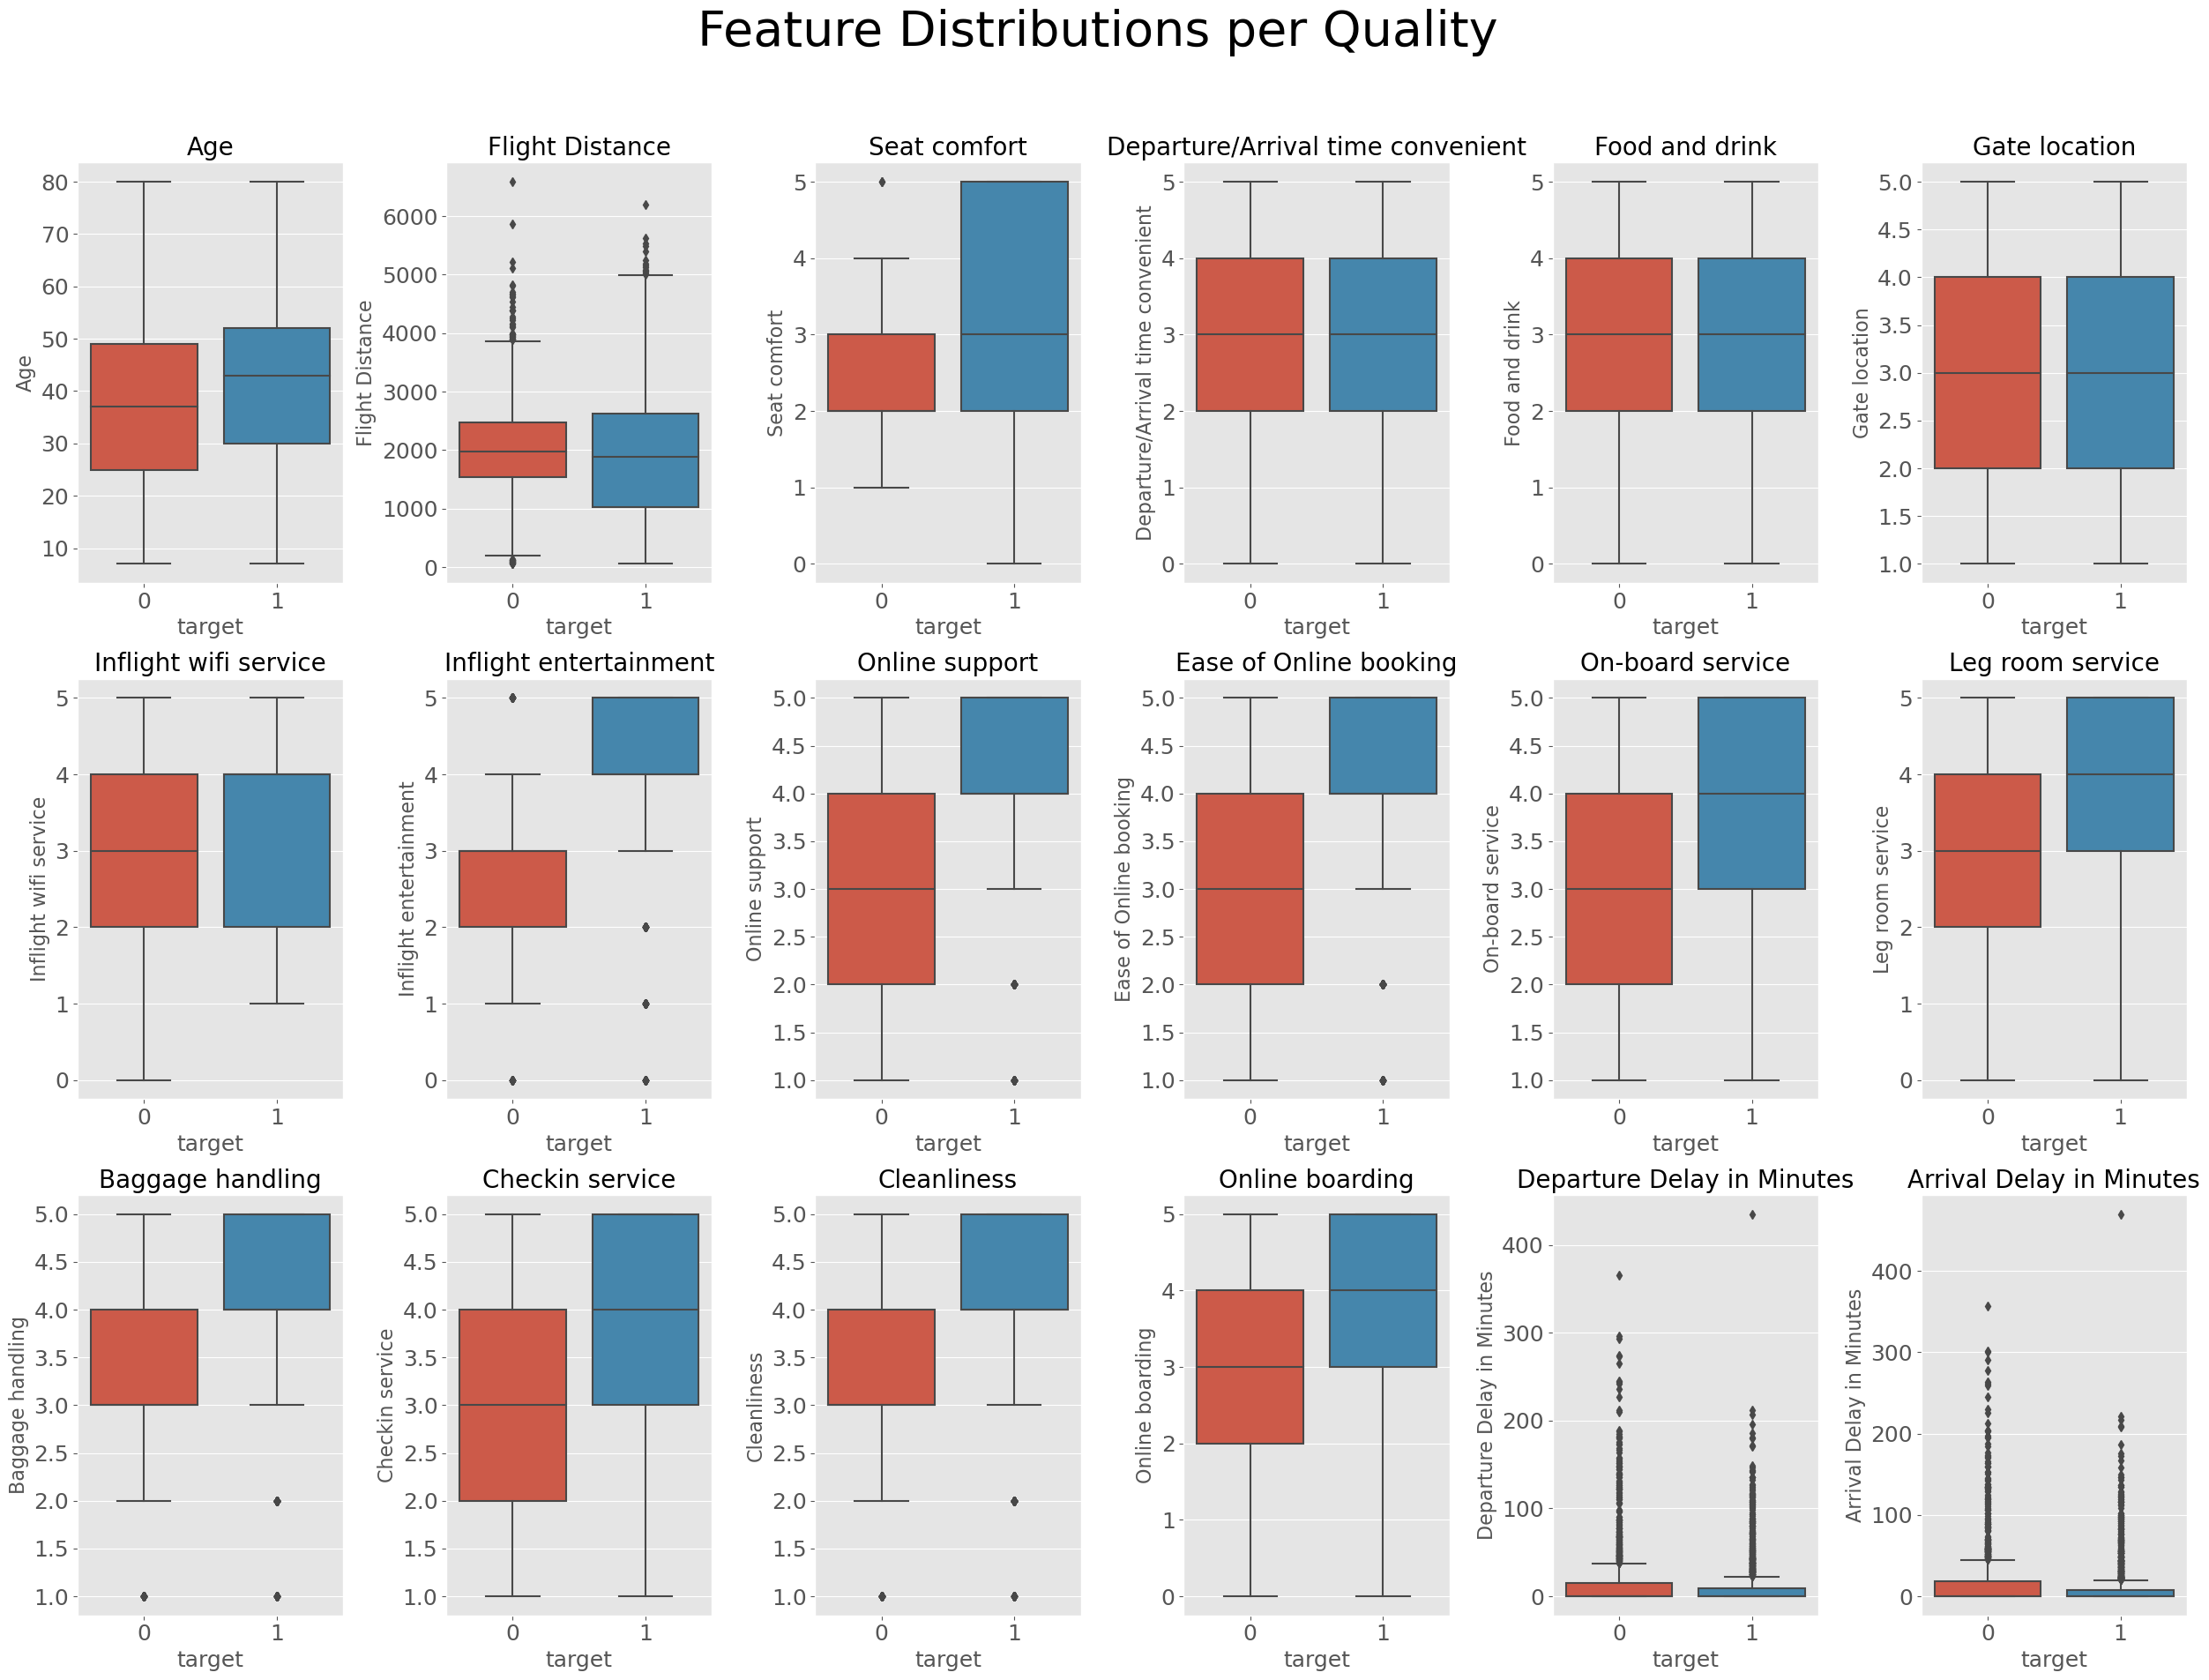

In [9]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('Feature Distributions per Quality', fontsize=40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x='target', y=col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)  # 각 그래프의 제목 폰트 크기
    ax.set_xlabel('target', fontsize=18)  # X축 제목 폰트 크기
    ax.set_ylabel(col, fontsize=16)       # Y축 제목 폰트 크기
    ax.tick_params(axis='x', labelsize=18)  # X축 눈금 폰트 크기
    ax.tick_params(axis='y', labelsize=18)  # Y축 눈금 폰트 크기

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


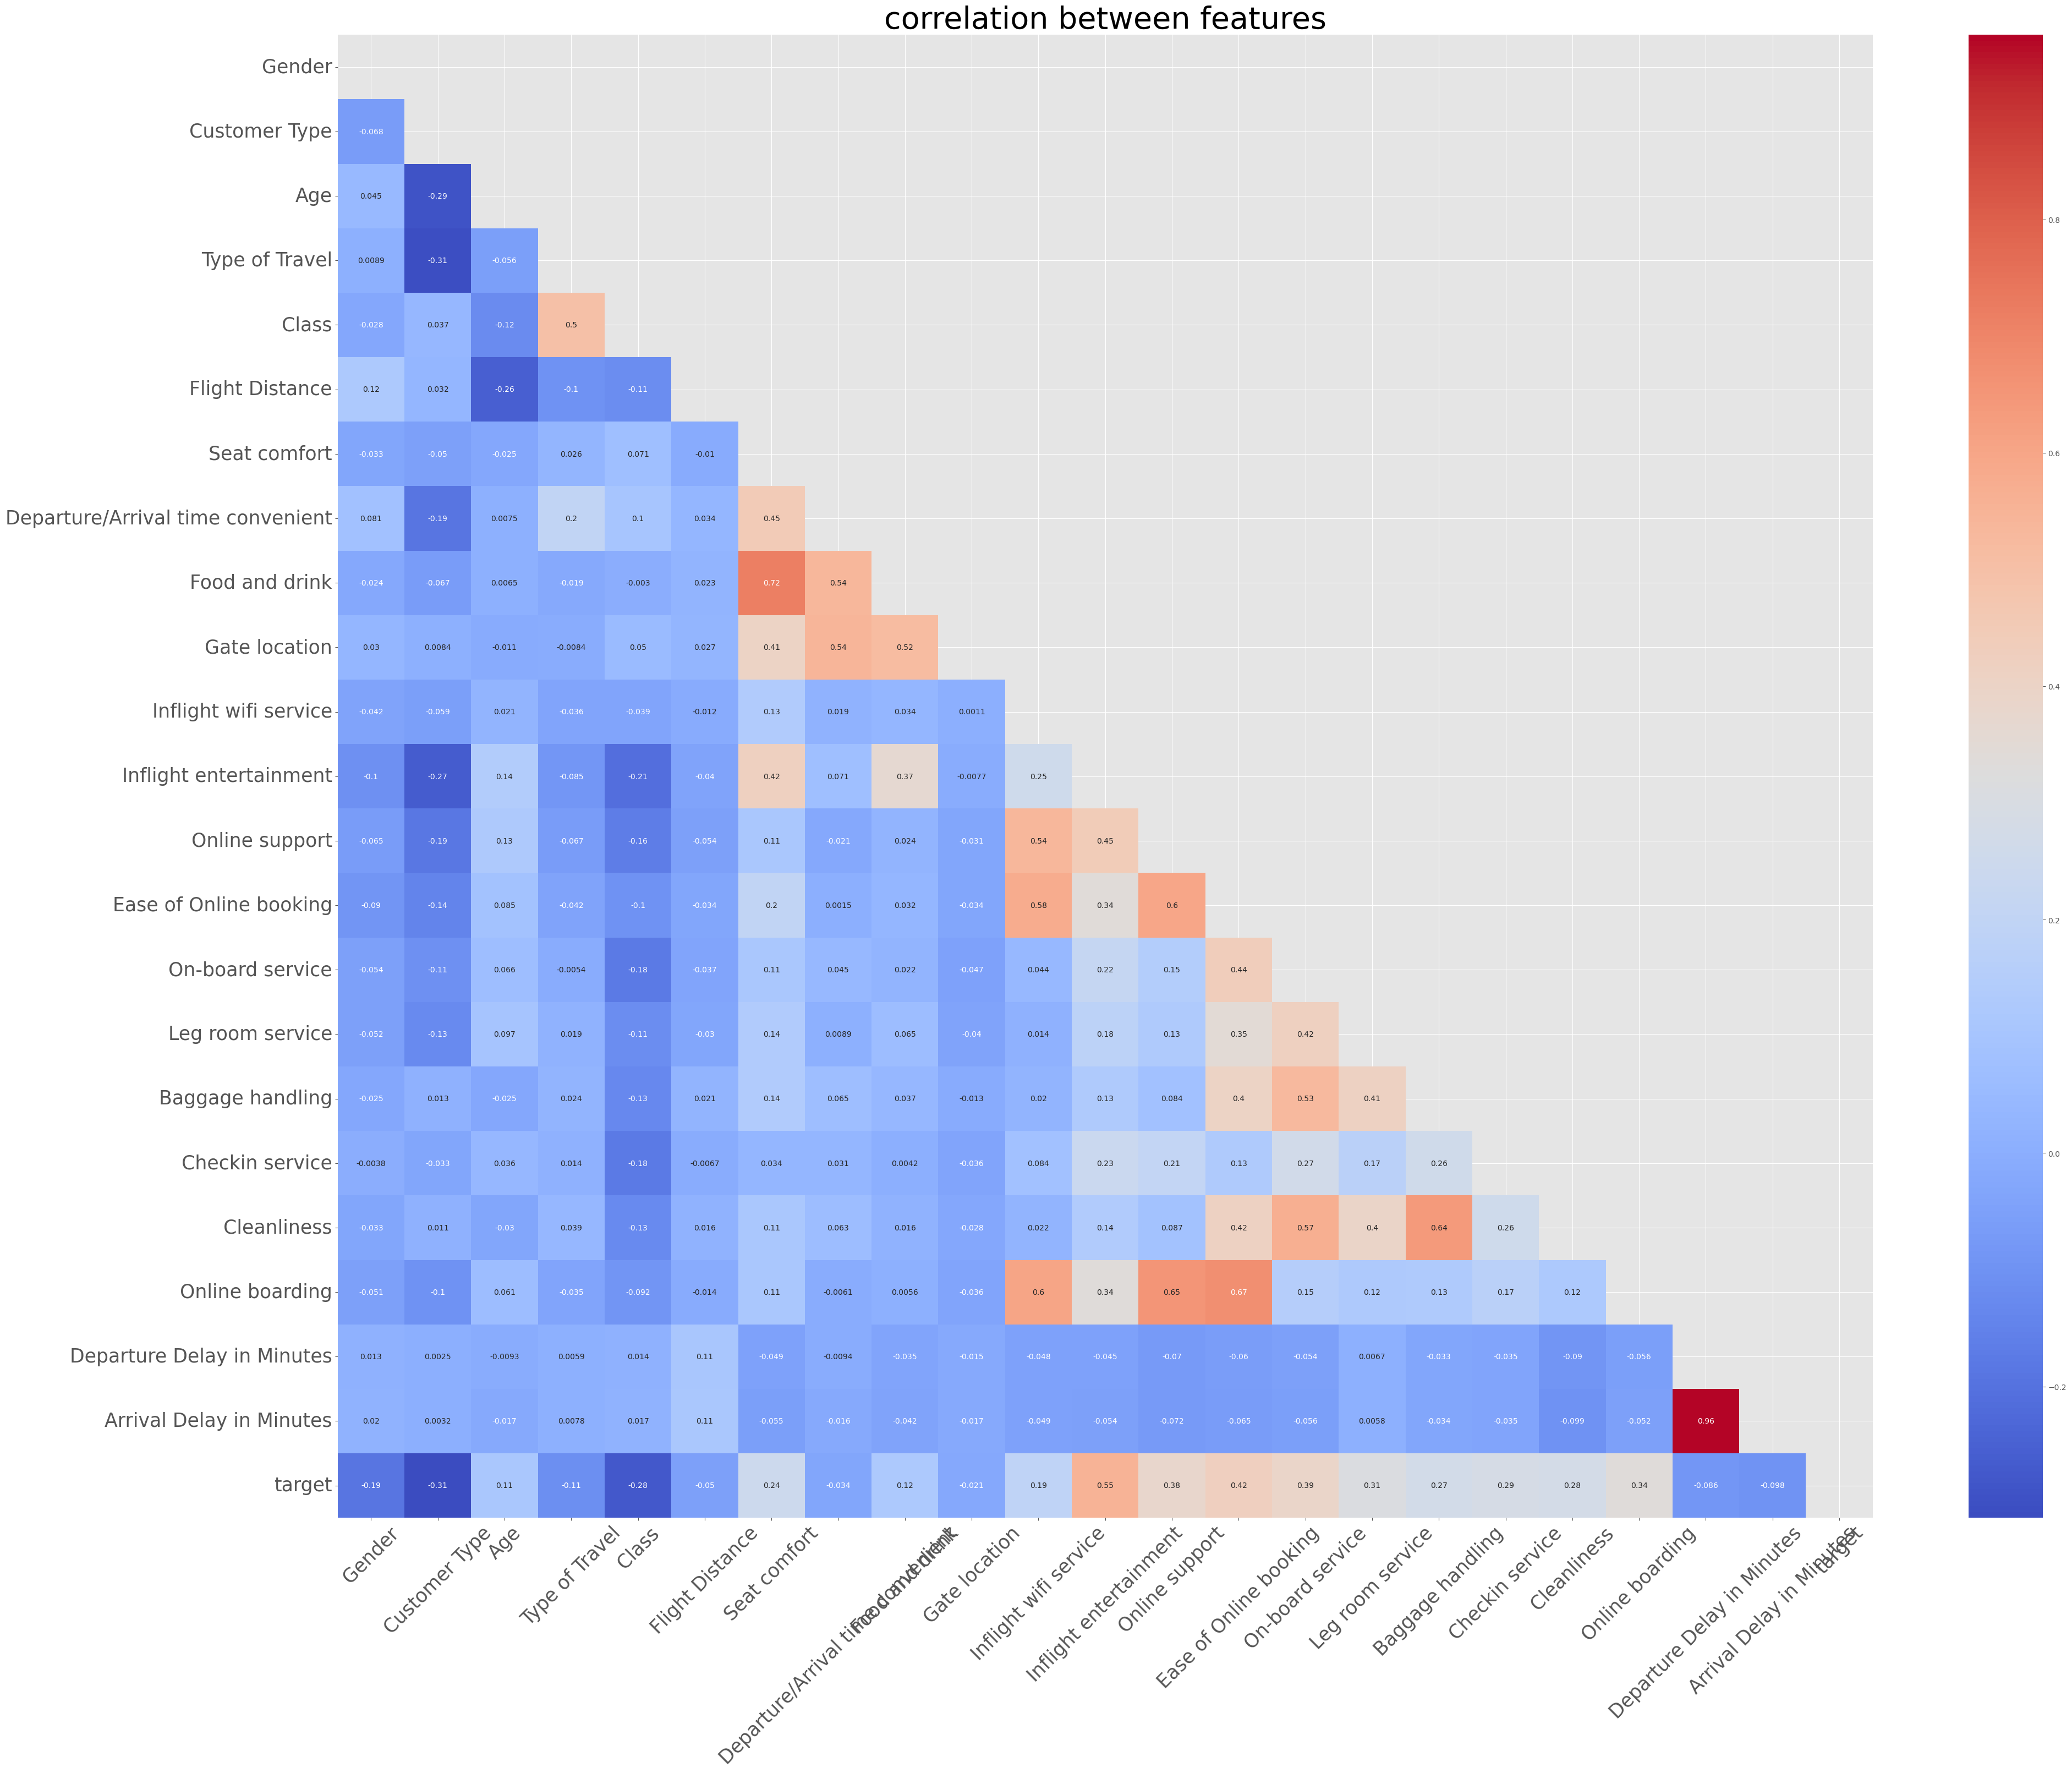

In [10]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
#상관관계 분석도
plt.figure(figsize=(45,35))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=25, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=25)
plt.title('correlation between features', fontsize=40)
plt.show()

In [11]:
train_x = data.drop(["target", 'Departure/Arrival time convenient', 
    'Gate location', 'Food and drink', 'Inflight wifi service','Flight Distance', 
    'Departure Delay in Minutes', 'Departure Delay in Minutes', 'Age'],axis=1) 
train_y = data.target 

In [12]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Gender                    2999 non-null   object
 1   Customer Type             2999 non-null   object
 2   Type of Travel            2999 non-null   object
 3   Class                     2999 non-null   object
 4   Seat comfort              2999 non-null   int64 
 5   Inflight entertainment    2999 non-null   int64 
 6   Online support            2999 non-null   int64 
 7   Ease of Online booking    2999 non-null   int64 
 8   On-board service          2999 non-null   int64 
 9   Leg room service          2999 non-null   int64 
 10  Baggage handling          2999 non-null   int64 
 11  Checkin service           2999 non-null   int64 
 12  Cleanliness               2999 non-null   int64 
 13  Online boarding           2999 non-null   int64 
 14  Arrival Delay in Minutes

In [13]:
encoded_train_x = pd.get_dummies(train_x, columns=['Gender', "Customer Type", "Type of Travel", "Class"], drop_first = True)

In [14]:
encoded_train_x.sample(10)

,Seat comfort,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
1631,4,4,5,5,5,5,5,5,5,5,0,True,False,False,False,False
2228,5,3,4,4,2,2,4,1,2,4,0,False,False,False,False,False
2806,4,4,2,2,3,5,4,3,4,2,0,False,True,False,False,False
626,5,4,5,5,1,2,4,1,3,5,0,False,False,False,False,False
1463,2,2,5,5,3,3,5,3,5,5,0,True,False,True,True,False
2504,4,4,4,5,2,5,4,4,4,4,25,True,False,False,True,False
2320,5,5,5,5,2,5,1,2,3,5,12,False,False,False,True,False
382,1,1,4,4,2,3,3,4,4,4,11,False,True,False,False,True
1050,3,4,4,4,4,5,4,4,4,3,13,False,False,False,False,False
1385,0,0,5,5,2,1,4,2,4,5,16,False,False,False,True,False


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
x_train, x_test, y_train, y_test = train_test_split(encoded_train_x, train_y, test_size = 0.2, random_state = 42)

xgb_model = XGBClassifier()

# StratifiedKFold를 사용한 5-Fold 교차 검증
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=cv, scoring='accuracy')

In [17]:


# 교차 검증 정확도 출력
print(f"교차 검증 정확도: {cv_scores}")
print(f"평균 교차 검증 정확도: {cv_scores.mean()}")

# 테스트 데이터에 대한 예측
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost 정확도: {accuracy}")

accuracy1 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
print(f"XGBoost 정확도(불만족을 불만족으로 예측): {accuracy1}")

accuracy2 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
print(f"XGBoost 정확도(만족을 비행기를 만족으로 예측): {accuracy2}")

'''accuracy3 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 1])
print(f"XGBoost 정확도(불만족을 만족으로 예측): {accuracy3}")

accuracy4 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 0])
print(f"XGBoost 정확도(만족을 비행기를 불만족으로 예측): {accuracy}")'''

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("XGBoost 혼동 행렬:")
print(conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print("XGBoost 분류 보고서:")
print(class_report)


교차 검증 정확도: [0.93125    0.91666667 0.93541667 0.94583333 0.9394572 ]
평균 교차 검증 정확도: 0.9337247738343771
XGBoost 정확도: 0.9266666666666666
XGBoost 정확도(불만족을 불만족으로 예측): 0.9397163120567376
XGBoost 정확도(만족을 비행기를 만족으로 예측): 0.9150943396226415
XGBoost 혼동 행렬:
[[265  17]
 [ 27 291]]
XGBoost 분류 보고서:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       282
           1       0.94      0.92      0.93       318

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [18]:
# 타겟 변수 지정
target_variable = 'target'  # 타겟 변수의 이름을 여기에 입력하세요

# 타겟 변수와의 상관계수 계산
target_corr = corr_df.corr()[target_variable]

# 상관계수의 절대값이 0.1보다 작은 특성 찾기
low_corr_features = target_corr[target_corr.abs() < 0.1]

print("Target과의 상관관계 절대값이 0.1보다 낮은 특성들:")
print(low_corr_features)


Target과의 상관관계 절대값이 0.1보다 낮은 특성들:
Flight Distance                     -0.049513
Departure/Arrival time convenient   -0.033857
Gate location                       -0.021198
Departure Delay in Minutes          -0.085529
Arrival Delay in Minutes            -0.097607
Name: target, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(encoded_train_x, train_y, test_size=0.2, random_state=42)

# 모델 리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000),
    "LightGBM": LGBMClassifier()
}

# StratifiedKFold를 사용한 5-Fold 교차 검증
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\n{name}")
    
    # 교차 검증 정확도
    cv_scores = cross_val_score(model, x_train, y_train, cv=cv, scoring='accuracy')
    print(f"교차 검증 정확도: {cv_scores}")
    print(f"평균 교차 검증 정확도: {cv_scores.mean()}")
    
    # 테스트 데이터에 대한 예측
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} 정확도: {accuracy}")
    
    accuracy1 = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])
    print(f"{name} 정확도(불만족을 불만족으로 예측): {accuracy1}")
    
    accuracy2 = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
    print(f"{name} 정확도(만족을 만족으로 예측): {accuracy2}")
    
    # 혼동 행렬 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"{name} 혼동 행렬:")
    print(conf_matrix)
    
    # 분류 보고서 출력
    class_report = classification_report(y_test, y_pred)
    print(f"{name} 분류 보고서:")
    print(class_report)



Logistic Regression
교차 검증 정확도: [0.81458333 0.85       0.82708333 0.84166667 0.8559499 ]
평균 교차 검증 정확도: 0.83785664578984
Logistic Regression 정확도: 0.8416666666666667
Logistic Regression 정확도(불만족을 불만족으로 예측): 0.8439716312056738
Logistic Regression 정확도(만족을 만족으로 예측): 0.839622641509434
Logistic Regression 혼동 행렬:
[[238  44]
 [ 51 267]]
Logistic Regression 분류 보고서:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       282
           1       0.86      0.84      0.85       318

    accuracy                           0.84       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.84      0.84      0.84       600


Decision Tree
교차 검증 정확도: [0.87083333 0.87916667 0.87291667 0.91041667 0.89352818]
평균 교차 검증 정확도: 0.8853723034098817
Decision Tree 정확도: 0.8983333333333333
Decision Tree 정확도(불만족을 불만족으로 예측): 0.9219858156028369
Decision Tree 정확도(만족을 만족으로 예측): 0.8773584905660378
Decision Tree 혼동 행렬:
[[260  22]
 [ 39 279]]
Decision Tree 